In [60]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import pandas as pd
import folium
from folium import IFrame
import base64

In [61]:
#Section that creates the map
data5 = pd.DataFrame({
   'lat':[111,140, -93, -135, -37,122, 123, 124,126,-9, 78,5,123,-175,-67,-112],
   'lon':[12,36, 23, 53, -14,24, 23, 22,33,55, 10,57,30,60,9,24],
   'name':['Vietnam', 'Japan', 'Mexico', 'Canada', 'Brazil','Taiwan', 
           'Taiwan','Taiwan','Korea','Scotland','India','Norway','China','Arctic','Venezuela','Mexico'],
   'value':[1.4,4.15,2.16,5.5,4.61,2.19,1.46,3.33,7.77,2.92, 13.22,3.38,3.68,23.19,61.8,5.83]
})
data5
 
# Make an empty map
m5 = folium.Map(location=[20,-20],
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/tile/{z}/{y}/{x}',
    attr='Tiles &copy; Esri &mdash; Source: Esri, DeLorme, NAVTEQ, USGS, Intermap, iPC, NRCAN, Esri Japan, METI, Esri China (Hong Kong), Esri (Thailand), TomTom, 2012',
    zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(data5)):
   folium.Circle(
      location=[data5.iloc[i]['lon'], data5.iloc[i]['lat']],
      popup=str(data5.iloc[i]['value'])+' ppm',
      radius=data5.iloc[i]['value']*20000.0,
      color='darkorange',
      fill=True,
      fill_color='orange'
   ).add_to(m5)


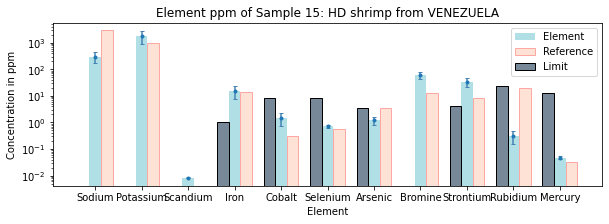

In [62]:
#Section that creates the first chart
#HD Shrimp
station = '42'
resolution, width, height = 75, 10.2, 5

elements = ['Sodium', 'Potassium', 'Scandium', 'Iron', 'Cobalt', 'Selenium',
           'Arsenic', 'Bromine', 'Strontium', 'Rubidium', 'Mercury']

ppm = [303.97, 1856.51, 0.0084, 15.57, 1.45, 0.72, 1.19, 61.80, 34.34, 0.31, 0.047]
x = np.linspace(1,len(ppm),len(ppm))
sys_unc = [133.68, 950.33, 0.00037, 7.78, 0.74, 0.066, 0.37, 19.83, 12.23, 0.15, 0.0058]
stat_unc = [3.37, 136.6, 0.00047, 0.83, 0.038, 0.045, 0.14, 3.45, 1.79, 0.019, 0.0022]
tot_unc = []
for i in x:
    val = (sys_unc[int(i)-1]**2+stat_unc[int(i)-1]**2)**0.5
    tot_unc.append(val)

mpl_fig = plt.figure(figsize=(9.85,3))
ax = mpl_fig.add_subplot(111)
w=0.25
p1 = ax.bar(x, ppm, w, color='powderblue', label='Element')

#reference values (based on averages)
ppm2 = [3000, 1000, 0, 13.5, 0.3, 0.58, 3.5, 13, 8, 20, 0.033]

#regulatory limits for the elements
limits = [0, 0, 0, 1, 8.48, 8, 3.5, 0, 4, 23, 13]

#reference graph
p2 = ax.bar(x+0.25, ppm2, w, color='lightsalmon', edgecolor='red', alpha=0.3, label='Reference')
#error bars
p3 = plt.errorbar(x, ppm, yerr=tot_unc, fmt='.', ecolor='steelblue', capthick=1, capsize=2)
#limits graph
p4 = ax.bar(x-0.25, limits, w, color='lightslategray', edgecolor='k', label='Limit')

plt.xlabel('Element')
plt.ylabel('Concentration in ppm')
plt.title('Element ppm of Sample 15: HD shrimp from VENEZUELA')
plt.legend()
plt.xticks(x, elements)
ax.set_yscale('log')

png = 'mpld3_{}.png'.format(station)
mpl_fig.savefig(png, dpi=resolution)

#encoded = base64.b64encode(open(png, 'rb').read()).decode()

encoded = base64.b64encode(open('html/hdShrimp.jpeg', 'rb').read()).decode()


In [63]:
html="""
    <body style="border:3px; border-style:solid; border-color:navy; padding: 1em;">
    <center><h3>HD Shrimp </h3></center>
    <p style="float: left; padding: 1px 30px 1px 1px">
    <img src="data:image/jpeg;base64,{}" style="width:125px;height:125px;" alt="Venezuela Concentrations">
    </p>
    <p style="padding: 1px 1px 10px 1px">
    <ul>
        <li><b>Location:</b> Venezuela</li>
        <li><b>Average size:</b> 0.06 kg</li>
        <li><b>Concentration:</b> 61.8 ppm</li>
        <li><b>Reference:</b> 13 ppm (limit not available)</li>
    </ul>
    </p>
    <p>
        It makes sense for the highest concentration of bromine to be located in the shrimp sample. Bromine is 
        extracted from sediments and so marine life that lives close to the ground or rocks take in larger amounts 
        of bromine than marine life elsewhere. Inorganic bromine is natural and is not present in harmful levels 
        in marine life to pose a threat, however, organic bromine introduced by humans is harmful and corrosive to 
        skin. Inhalation of inorganic bromine can also pose serious health effects. To learn more about the effects of
        organic bromine, click <a href="https://www.lenntech.com/periodic/elements/br.htm">here</a>.
    </p>
    </body>
    """.format
iframe = IFrame(html(encoded), width=(width*resolution)+20, height=(height*resolution))
popup = folium.Popup(iframe, max_width=2650, min_width=(width*resolution)+20)

folium.Marker([9,-67], popup=popup).add_to(m5)

m5.save('html/BromineMap.html')

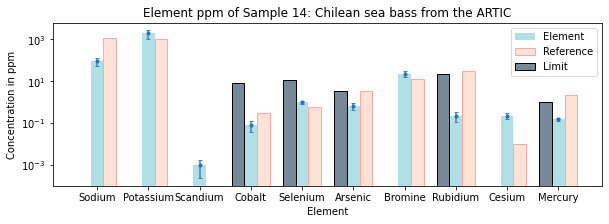

In [64]:
#Section that creates the second chart
#Arctic chilean sea bass
station = '42'
resolution, width, height = 75, 10.2, 5

elements = ['Sodium', 'Potassium', 'Scandium', 'Cobalt', 'Selenium', 'Arsenic',
           'Bromine', 'Rubidium', 'Cesium', 'Mercury']

ppm = [91.89, 1930.47, 0.001, 0.08, 0.96, 0.64, 23.19, 0.22, 0.22, 0.15]
x = np.linspace(1,len(ppm),len(ppm))
sys_unc = [40.3, 834.62, 0.0007, 0.04, 0.092, 0.19, 6.97, 0.1, 0.067, 0.018]
stat_unc = [1.93, 123.31, 0.00034, 0.012, 0.057, 0.099, 3.75, 0.027, 0.025, 0.0079]
tot_unc = []
for i in x:
    val = (sys_unc[int(i)-1]**2+stat_unc[int(i)-1]**2)**0.5
    tot_unc.append(val)

mpl_fig = plt.figure(figsize=(9.85,3))
ax = mpl_fig.add_subplot(111)
w=0.25
p1 = ax.bar(x, ppm, w, color='powderblue', label='Element')

#reference values (based on averages)
ppm2 = [1120, 1000, 0, 0.3, 0.58, 3.5, 13, 30, 0.01, 2.18]

#regulatory limits for the elements
limits = [0, 0, 0, 8.48, 11.3, 3.5, 0, 23, 0, 1]

#reference graph
p2 = ax.bar(x+0.25, ppm2, w, color='lightsalmon', edgecolor='red', alpha=0.3, label='Reference')
#error bars
p3 = plt.errorbar(x, ppm, yerr=tot_unc, fmt='.', ecolor='steelblue', capthick=1, capsize=2)
#limits graph
p4 = ax.bar(x-0.25, limits, w, color='lightslategray', edgecolor='k', label='Limit')

plt.xlabel('Element')
plt.ylabel('Concentration in ppm')
plt.title('Element ppm of Sample 14: Chilean sea bass from the ARTIC')
plt.legend()
plt.xticks(x, elements)
ax.set_yscale('log')

png = 'mpld3_{}.png'.format(station)
mpl_fig.savefig(png, dpi=resolution)

#encoded = base64.b64encode(open(png, 'rb').read()).decode()

encoded = base64.b64encode(open('html/chileanSeaBass.jpeg', 'rb').read()).decode()


In [65]:
#second pop up
html="""
    <body style="border:3px; border-style:solid; border-color:navy; padding: 1em;">
    <center><h3>Chilean Sea Bass </h3></center>
    <p style="float: left; padding: 1px 30px 1px 1px">
    <img src="data:image/jpeg;base64,{}" style="width:200px;height:100px;" alt="Arctic Concentrations">
    </p>
    <p style="padding: 1px 1px 10px 1px">
    <ul>
        <li><b>Location:</b> Arctic</li>
        <li><b>Average size:</b> 40 kg</li>
        <li><b>Concentration:</b> 23.19 ppm</li>
        <li><b>Reference:</b> 13 ppm (limit not available)</li>
    </ul>
    </p>
    <p>
        Chilean Sea Bass live around deep water during the winter and migrate to shallow water during warmer 
        seasons. They spend most of their lives in coastal regions which explains their exposure to bromine. 
        To learn more about their habitat, click <a href="https://en.wikipedia.org/wiki/Patagonian_toothfish#Ecology">here</a>
    </p>
    </body>
    """.format
iframe = IFrame(html(encoded), width=(width*resolution), height=(height*resolution))
popup = folium.Popup(iframe, max_width=2650, min_width=(width*resolution)+20)

folium.Marker([60,-175], popup=popup).add_to(m5)

m5.save('html/BromineMap.html')

In [66]:
m5